#### CRM raw 2023 deal dataset exploration

A deal hear represents a CRM entity for one-off product sale to a customer rather than a subscription sale. Deals follow a straightforward methodology, a new deal is created when new sales opportunity is identified; any deal will be closed as won or lost over a period of time called the sales cycle.  

Deals are associated with customer accounts aka companies; this should be one (company) to (many) deals association. Few attributes of companies are present in the deal dataset. Deals are devided into first sale to a new customer and the repetead or 2nd+ sales; first deals are as well attributed to the particular sales channel recorded in the Deal_source variable. We presume that 1st deals are in 1-1 relationship to their customer companies, more exacttly each company having 1 (or 0) 1st deals and each first deal is associated with one and only one company.  

As the case with real life data there are number of inconsistencies and errors in the dataset, let it be discovered it we move on with the exploration. 

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
# file2read = '/Users/andrew/Documents/2023 JUPYTER Notebook/swag42 notebooks/\
# data/hubspot-crm-exports-deals-all-pieplienes-export-v-20240131-(excl 2 Niall prop deals.csv'

file2read = '/Users/andrew/Documents/Revops data portfolio_git/data/2023 raw deal dataset.csv'

df = pd.read_csv(file2read) #, index_col = 'Record ID')

In [97]:
df.head()

,Unnamed: 0,Record_ID,Deal_Name,Deal_Stage,Close_Date,Associated_Company,int_Related_company_HC,int_Related_company_Industry,Pipeline,Amount_in_company_currency,Create_Date,Deal_source,Associated_Company_IDs,Associated_Contact_IDs,Deal_owner
0,0,10628599778,Justin Joy / Eventex - Darina,Design/Estimation,2024-02-29 18:20,Justin Joy,NaN,NaN,Customer Success,5000.00,2024-01-25 18:21,Existing customer,9436391145,2448301,Darina
1,1,10186696421,N1Affiliates - ICE Julia,Closed won,2024-01-04 11:10,N1Affiliates,NaN,NaN,Customer Success,8000.00,2023-12-18 13:14,Field/Offline event,9028271081,2234451;2294602,Julia
2,2,9216442856,Hieronymusj - New Deal,Closed won,2023-10-04 11:13,Hieronymusj,2.0,ARTS_AND_CRAFTS,Account Exec,1764.00,2023-10-04 11:13,Inbound,8010401265,1084851,Mads
3,3,7806147518,GDCY-lanyards-Alena,Closed won,2023-06-13 10:32,Game Dev Cyprus,3.0,NaN,Account Exec,1302.48,2023-06-11 09:24,Existing customer,6944613854,2009,Alena
4,4,7318563518,GDCY-ланьярды 1000шт-Алена,Closed won,2023-05-08 15:11,Game Dev Cyprus,3.0,NaN,Account Exec,675.00,2023-05-02 09:54,Existing customer,6944613854,2009,Alena


____Pre-processing____

In [147]:
#column names for conv
df.columns = df.columns.str.replace(' ', '_')

In [134]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed:_0                    934 non-null    int64         
 1   Record_ID                     934 non-null    int64         
 2   Deal_Name                     934 non-null    object        
 3   Deal_Stage                    934 non-null    object        
 4   Close_Date                    934 non-null    datetime64[ns]
 5   Associated_Company            934 non-null    object        
 6   int_Related_company_HC        932 non-null    float64       
 7   int_Related_company_Industry  757 non-null    object        
 8   Pipeline                      934 non-null    object        
 9   Amount_in_company_currency    934 non-null    float64       
 10  Create_Date                   934 non-null    datetime64[ns]
 11  Deal_source                   93

In [229]:
#convert dates column into date types
df[['Create_Date', 'Close_Date']] = df[['Create_Date', 'Close_Date']]\
                                     .apply(pd.to_datetime)

In [230]:
#checking for nulls
df.isnull().sum()

Unnamed: 0                        0
Record_ID                         0
Deal_Name                         0
Deal_Stage                        0
Close_Date                        0
Associated_Company                0
int_Related_company_HC            2
int_Related_company_Industry    177
Pipeline                          0
Amount_in_company_currency        0
Create_Date                       0
Deal_source                       0
Associated_Company_IDs            0
Associated_Contact_IDs            4
Deal_owner                        5
dtype: int64

In [231]:
#split ID's stirngs into lists with dtype = string
df['Split_Associated_Contact_IDs'] = df['Associated_Contact_IDs'].str.split(";")
df['Split_Associated_Company_IDs'] = df['Associated_Company_IDs'].str.split(";")

In [233]:
#check where a deal is associated with 1+ companies which in fact is an incosistency 
df[ df.Split_Associated_Company_IDs.apply(lambda x: len(x)) > 1]

,Unnamed: 0,Record_ID,Deal_Name,Deal_Stage,Close_Date,Associated_Company,int_Related_company_HC,int_Related_company_Industry,Pipeline,Amount_in_company_currency,Create_Date,Deal_source,Associated_Company_IDs,Associated_Contact_IDs,Deal_owner,Split_Associated_Contact_IDs,Split_Associated_Company_IDs
195,195,8298572990,s-t.global - NY 2024 - Nikita,Closed won,2023-11-28 14:33:00,Smartteam;s-t.global,50.00,INFORMATION_TECHNOLOGY_AND_SERVICES,Account Exec,"29,493.43",2023-07-18 17:14:00,Inbound,9023975355;8054604736,1193251,Mykyta,[1193251],"[9023975355, 8054604736]"
348,348,8461628618,Armenotech=Aps.Money - Merch - Nikita,Closed won,2023-10-12 19:48:00,Alfa Capital Holdings (Cyprus) Limited;Armenot...,120.00,INFORMATION_TECHNOLOGY_AND_SERVICES,Account Exec,"4,084.02",2023-08-01 23:20:00,Outbound,7058460383;8111065818,42551,Mykyta,[42551],"[7058460383, 8111065818]"
356,356,6892972737,Aventus Group - New Deal,Closed won,2023-05-26 17:24:00,Aventus IT;Aventus Group,122.00,LEGAL_SERVICES,Account Exec,"7,728.00",2023-03-15 09:16:00,Inbound,6944655583;7115967952,68501,Nastasiia,[68501],"[6944655583, 7115967952]"
549,549,8676604917,"Optibet - Hoodie, bomber, t-shirt",Closed won,2023-10-17 14:43:00,Enlabs;Optibet,300.00,MARKET_RESEARCH,Account Exec,"11,671.92",2023-08-24 09:21:00,Other,8300148415;8409566413,1730551,Mykyta,[1730551],"[8300148415, 8409566413]"
749,749,8432151545,NY 2024 - Growe - Tanya,Closed won,2023-09-01 09:49:00,Pmi;Growe,700.00,COMPUTER_SOFTWARE,Account Exec,"210,000.00",2023-07-29 12:20:00,Other,7906141662;8310276089,1741501;735751;1794751;1508951;966701,Tanya,"[1741501, 735751, 1794751, 1508951, 966701]","[7906141662, 8310276089]"


In [234]:
#for simplicity get the first company ID into the add column
df['Ass_Company_ID_1st'] = df.Split_Associated_Company_IDs.apply(lambda x: x[0])

In [235]:
df.columns

Index(['Unnamed: 0', 'Record_ID', 'Deal_Name', 'Deal_Stage', 'Close_Date',
       'Associated_Company', 'int_Related_company_HC',
       'int_Related_company_Industry', 'Pipeline',
       'Amount_in_company_currency', 'Create_Date', 'Deal_source',
       'Associated_Company_IDs', 'Associated_Contact_IDs', 'Deal_owner',
       'Split_Associated_Contact_IDs', 'Split_Associated_Company_IDs',
       'Ass_Company_ID_1st'],
      dtype='object')

In [237]:
#Drop the columns we will not need further on

col2drop= [ 
        #'Record_ID', 
       'Deal_Name', 
        #'Deal_Stage', 'Close_Date', 'Deal_owner',
        #'Associated_Company', 'int_Related_company_HC', 'Pipeline',
        #'Amount_in_company_currency', 'Create_Date', 'Deal_source',
        #'Associated_Contact', 
       'Associated_Company_IDs',
       'Associated_Contact_IDs', 'Split_Associated_Contact_IDs',
       'Split_Associated_Company_IDs', 
        #'Ass_Company_ID_1st'
        ]

deals = df.drop(col2drop, axis = 1)\
                                    .copy()

In [238]:
#deals.shape
#deals.isnull().sum()
#deals.query('Deal_owner == "Karina Rudenko"')
#deals.Deal_owner.value_counts()
#deals.Deal_source.value_counts()
# deals[ deals.Create_Date < pd.to_datetime('2024-01-01') ]
# deals.query('Create_Date < "2024-01-01"')
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    934 non-null    int64         
 1   Record_ID                     934 non-null    int64         
 2   Deal_Stage                    934 non-null    object        
 3   Close_Date                    934 non-null    datetime64[ns]
 4   Associated_Company            934 non-null    object        
 5   int_Related_company_HC        932 non-null    float64       
 6   int_Related_company_Industry  757 non-null    object        
 7   Pipeline                      934 non-null    object        
 8   Amount_in_company_currency    934 non-null    float64       
 9   Create_Date                   934 non-null    datetime64[ns]
 10  Deal_source                   934 non-null    object        
 11  Deal_owner                    92

In [239]:
#reinstate Mads for 5 no owner deals
deals.Deal_owner = deals.Deal_owner.fillna('Mads')

#### Exploring the data

In [240]:
#get a slice for 1st deals created within 2023
first_deals = deals.query('Deal_source != "Existing customer" and Create_Date < "2024-01-01" and Pipeline != "Customer Success"')

In [241]:
first_deals.shape

(451, 13)

__Taking a look at size distribution for 1st deals and exploring relationships between deal and company sizes__

In [242]:
#check data for deal amounts, it's skewed
first_deals.Amount_in_company_currency.describe()

count       451.00
mean      8,756.52
std      18,746.64
min           0.00
25%       2,000.00
50%       4,365.36
75%       8,241.86
max     224,390.17
Name: Amount_in_company_currency, dtype: float64

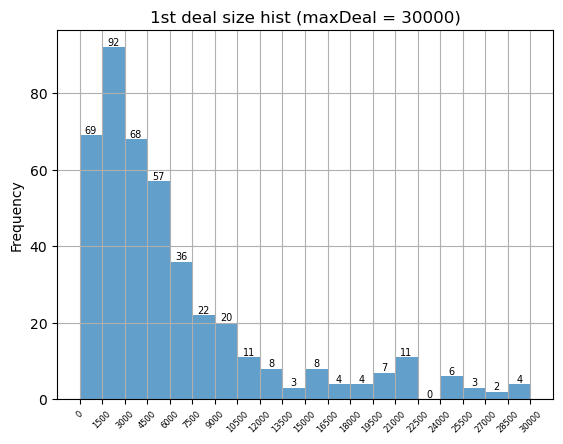

In [243]:
#fastplot 1st deal amounts hist, casting out outliers
maxDeal =  first_deals.Amount_in_company_currency.quantile(0.96)
#maxDeal = first_deals.Amount_in_company_currency.max()

binz = np.arange(0, maxDeal + 1500, 1500, dtype = np.int64)

ax = first_deals.Amount_in_company_currency.\
                    plot(kind= 'hist', bins=  binz, grid = True, alpha = .7)

plt.title('1st deal size hist (maxDeal = {})'.format(round(maxDeal)))
plt.xticks(binz, fontsize= 6, rotation = 45)
ax.bar_label(ax.containers[0], fontsize= 7);

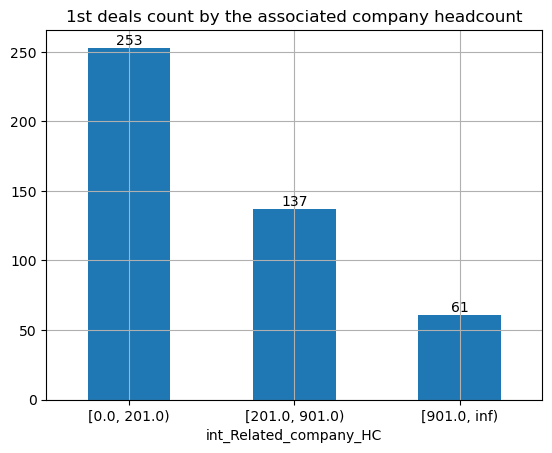

In [260]:
#check N of 1st deals  per Company sizes, work with custom bins  
ax = pd.cut(first_deals.int_Related_company_HC, bins = [0, 201, 901, float('inf')], right = False)\
                        .value_counts()\
                        .plot(kind = 'bar', grid = True)

plt.title('1st deals count by the associated company headcount')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0]);

Custom bins here correspond to the company segmentaion by size (which is measured by headcounts) accepted in 2023

__What about deal created per industry?__

In [245]:
# first_deals.int_Related_company_Industry\
#                         .value_counts(dropna = False)

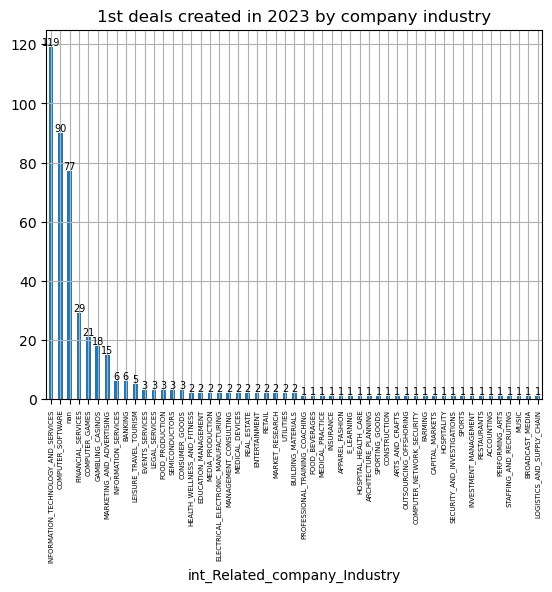

In [207]:
#check company Indusrty distribution for 1st deals as created  
ax = first_deals.int_Related_company_Industry\
                        .value_counts(dropna = False)\
                        .plot(kind = 'bar', grid = True)

plt.title('1st deals created in 2023 by company industry')
plt.xticks(rotation = 90, fontsize = 5)
ax.bar_label(ax.containers[0], fontsize = 7);

__Headcount frequencies and more details for Deal amount vs company HC__

In [208]:
#we assumed that 1st deals are 1-1 with companies, checking headcounts frequencies
first_deals.groupby(['int_Related_company_HC'])\
  .agg( 
        N_values = ('Record_ID', 'count'),
        Percent = ('Record_ID', lambda x: (100* x.count() / first_deals.shape[0]).round(1).astype('str') + '%')  
      )\
                       .sort_values(['N_values'], ascending = False)\
                       .head(15)

,N_values,Percent
int_Related_company_HC,,
50.00,49,10.9%
500.00,22,4.9%
200.00,18,4.0%
10.00,16,3.5%
201.00,13,2.9%
30.00,11,2.4%
"1,000.00",11,2.4%
25.00,8,1.8%
100.00,8,1.8%


As the company headcounts are approximate measures taken from sourcing process for the targeted accounts there are abnormal freaquencies for sharp numbers of like 50, 500, 200 etc 

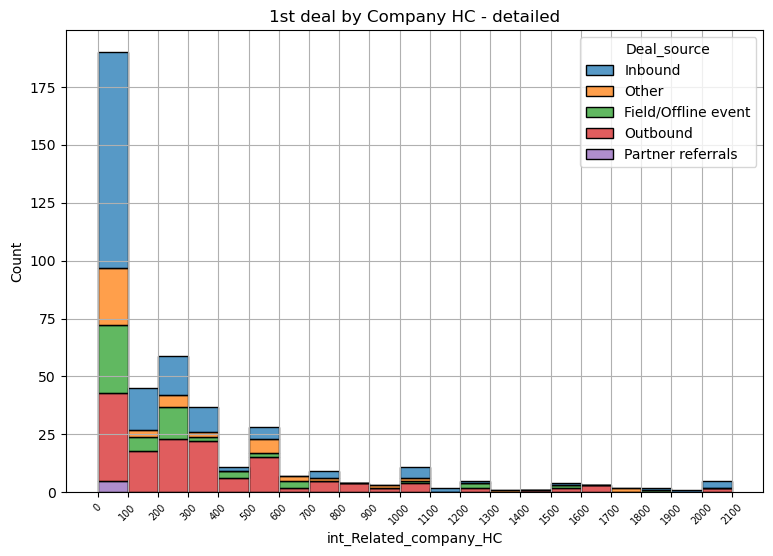

In [209]:
#add more details into N new deals vs company HC chart, color code the deal source
HC_upperbound: int = 2100 #for plot to fit

deal_bins = np.arange(0, HC_upperbound + 100, 100)
#deal_bins1 = np.sort( np.hstack((deal_bins, [210, 510, 1010])))

plt.figure(figsize = (9,6))

ax = sns.histplot(
             data = first_deals, 
             x = 'int_Related_company_HC', 
             hue = "Deal_source",
             bins= deal_bins,
             #kind = 'kde',
             #col = "Deal_source", 
             multiple = "stack"
            )

ax.set_xticks(deal_bins)
ax.set_xticklabels(ax.get_xticks(), size = 7)
ax.set_xticklabels(ax.get_xticks(), rotation= 45)
ax.set_title('1st deal by Company HC - detailed')
#ax.set_yticks(ticks=10, minor=True)

ax.grid()
plt.show()

Bu far the most deals were brough around by cusotmer sccounts up to 100 employees in size. Inbound and outbound are two major sources for new deals are more or less evenly distributed across the company sizes.

__Take a look and cast out outliers for deal amount and company HC__

In [211]:
#slice data to rid of outliers

#arbitrary values for testing
SubSet_1 = ( first_deals.Amount_in_company_currency < 150000 ) & \
           ( first_deals.int_Related_company_HC < 2000 )

#set outliers out 4% percentiles for deal amounts and company HCs
DealAmount_upper = first_deals.Amount_in_company_currency.quantile(0.96)
CoHC_upper = first_deals.int_Related_company_HC.quantile(0.96)

SubSet_3 = ( first_deals.Amount_in_company_currency <= DealAmount_upper ) & \
           ( first_deals.int_Related_company_HC <= CoHC_upper )

In [212]:
# Deal amount outliers
# first_deals[ first_deals.Amount_in_company_currency > DealAmount_upper  ]\
#              .sort_values(['Amount_in_company_currency'] , ascending = False)

In [213]:
# company HeadCount outliers
# first_deals[ first_deals.int_Related_company_HC > CoHC_upper  ]\
#             .sort_values(['int_Related_company_HC'] , ascending = False)

__Explore dependency between deal amount and the associated company HC for each of the deal sources__

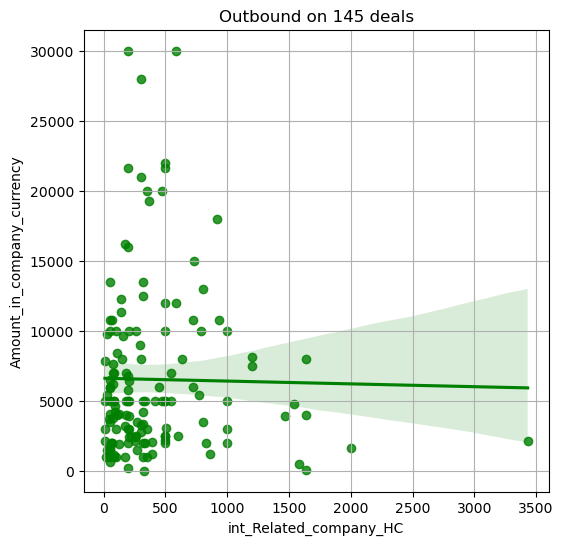

In [214]:
#regplot with trend line for Outbound wo outliers
plt.figure(figsize = (6,6))

Outbound_1stDeals = first_deals[ SubSet_3 & 
                                (first_deals.Deal_source == 'Outbound')
                               ]

ax = sns.regplot(data = Outbound_1stDeals, 
                        y = 'Amount_in_company_currency', 
                        x = 'int_Related_company_HC',
                        scatter = True,
                        color = 'g'
                        )
ax.set_title( 'Outbound on {} deals'.format( Outbound_1stDeals.shape[0] ))

plt.grid()

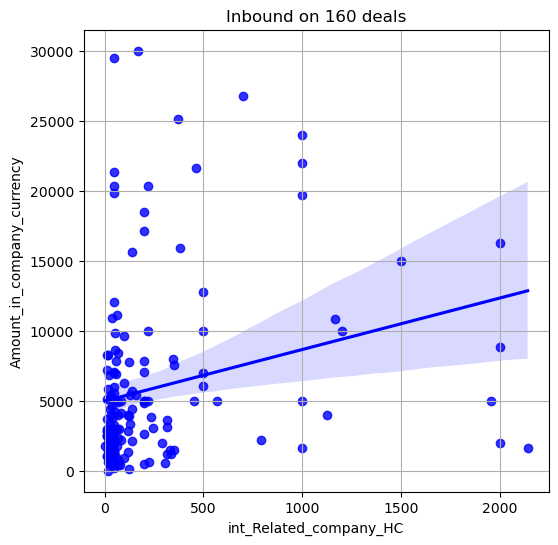

In [215]:
#regplot with trend line for Inbound - wo outliers
plt.figure(figsize = (6,6))

Inbound_1stDeals = first_deals[ SubSet_3 & 
                               (first_deals.Deal_source == 'Inbound') 
                              ]

ax = sns.regplot(data = Inbound_1stDeals, 
              y = 'Amount_in_company_currency', 
              x = 'int_Related_company_HC', 
              scatter = True,
              color = 'b'
             )

ax.set_title( 'Inbound on {} deals'.format( Inbound_1stDeals.shape[0] ))

# plt.xscale('log')
# plt.yscale('log')
plt.grid()

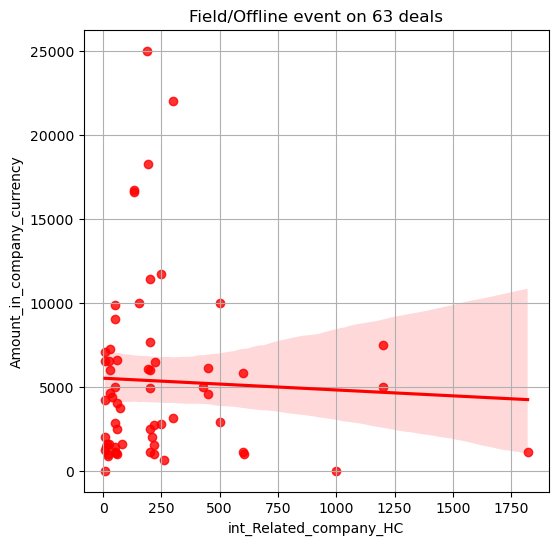

In [216]:
#regplot with trend line for Inbound - wo Outliers
plt.figure(figsize = (6,6))

Field_1stDeals = first_deals[ SubSet_3 & 
                             (first_deals['Deal_source'] == 'Field/Offline event') 
                            ]

ax = sns.regplot( data = Field_1stDeals, 
                  y = 'Amount_in_company_currency', 
                  x = 'int_Related_company_HC', 
                  scatter = True,
                  color = 'r'
                 )

ax.set_title( 'Field/Offline event on {} deals'.format( Field_1stDeals.shape[0] ))

plt.grid()

The slope of the LSRL line in the charts above (LSRL for Least Squared Regression Line) would represent correlation between 1st deal size and the related company size measured as the headcount. The graphs tell us there is some correlation for Inbound and none to even slight negative for Outbound and Field deals. If a larger account comes across the pipeline you could naturally expect a higher probability of getting a bigger sale in this business.

Which posses a good question for further research, i.e. what and at which stage does it wrong with Outbound an Field deal channels? 

__Let us just calculate the correlations coefficients__

In [217]:
from scipy.stats import pearsonr

#format float display
pd.options.display.float_format = '{:,.2f}'.format

In [218]:
#a quick way
first_deals[ SubSet_3 & 
            (first_deals.Deal_source == 'Inbound') 
           ]\
           [['Amount_in_company_currency', 'int_Related_company_HC']]\
            .corr()

,Amount_in_company_currency,int_Related_company_HC
Amount_in_company_currency,1.00,0.25
int_Related_company_HC,0.25,1.00


In [219]:
# calc correlations coeff for deals less outliers
for d_source in first_deals.Deal_source.unique():
    x = first_deals[ SubSet_3 & (first_deals['Deal_source'] == d_source) ]['int_Related_company_HC'] 
    y = first_deals[ SubSet_3 & (first_deals['Deal_source'] == d_source) ]['Amount_in_company_currency']
    count = first_deals[ SubSet_3 & (first_deals['Deal_source'] == d_source)].shape[0]
    
    corr, _ = pearsonr(x, y)
    
    print(f'Pearson corr excl outliers: {corr:.3f} for {d_source} deals on {count} deal values')

Pearson corr excl outliers: 0.247 for Inbound deals on 160 deal values
Pearson corr excl outliers: -0.149 for Other deals on 46 deal values
Pearson corr excl outliers: -0.044 for Field/Offline event deals on 63 deal values
Pearson corr excl outliers: -0.016 for Outbound deals on 145 deal values
Pearson corr excl outliers: -0.057 for Partner referrals deals on 5 deal values


Here we got exact numbers confirming the trend line slopes seen in the charts above 

In [224]:
# Correlation is sensitive for outliers, just check out correlations for the original data before outliers removed
for d_source in first_deals.Deal_source.unique():
    x = first_deals[ first_deals.Deal_source  == d_source ]['int_Related_company_HC'] 
    y = first_deals[ first_deals.Deal_source == d_source ]['Amount_in_company_currency']
    
    count = first_deals[ first_deals.Deal_source == d_source ].shape[0]
    
    corr, _ = pearsonr(x, y)
    print(f'Pearson corr All deals: {corr:.3f} for {d_source} deals on {count} deal values')

Pearson corr All deals: 0.089 for Inbound deals on 169 deal values
Pearson corr All deals: -0.054 for Other deals on 51 deal values
Pearson corr All deals: 0.350 for Field/Offline event deals on 66 deal values
Pearson corr All deals: -0.008 for Outbound deals on 160 deal values
Pearson corr All deals: -0.057 for Partner referrals deals on 5 deal values


Outliers totally mess our correlations up

__Check correlations between 2nd+ total deals and company HC__

In [248]:
#get a slice for existing customer (or 2nd+) deals
secondplus_deals = deals.query( 'Deal_source == "Existing customer" and Create_Date < "2024-01-01"') #[ deals['Deal_source'] == 'Existing customer' ]

In [253]:
#group by Company and sum up deal values
Cos_w_2ndPlusDeals = secondplus_deals.groupby(
                by = 'Ass_Company_ID_1st'
                )\
                .agg(
                    {'Amount_in_company_currency': ['sum', 'count', 'mean'],\
                    'int_Related_company_HC':lambda x: np.unique(x)[0],
                    'Associated_Company':lambda x: str(np.unique(x)[0])}
                    ).reset_index()

#set display options
pd.options.display.float_format = '{:,.0f}'.format

Cos_w_2ndPlusDeals.sort_values(by = [('Amount_in_company_currency', 'sum')], ascending = False).head(10)

Ass_Company_ID_1st Amount_in_company_currency                
                                              sum count   mean   
63          7000251093                    617,138    10 61,714  \
70          7001605834                    455,698    28 16,275   
73          7001613274                    228,161     6 38,027   
29          6943913199                    183,300    11 16,664   
147         8310276089                    144,963     6 24,160   
25          6943872965                    103,907     3 34,636   
31          6943913410                     91,584     6 15,264   
16          6943852261                     87,353     7 12,479   
65          7000251103                     77,923     1 77,923   
13          6943828193                     77,494     5 15,499   

    int_Related_company_HC            Associated_Company  
                  <lambda>                      <lambda>  
63                   5,000                 Wargaming.net  
70                     663                 Exness_Cyprus  
73                   1,000               Soft2bet_Cyprus  
29                   1,200                       Semrush  
147                    700                         Growe  
25                     201                    Azur Games  
31                   5,000                      Intetics  
16                     500  SDV / Social Discovery Group  
65                      10                Sbermegamarket  
13                     300                        LeverX

In [254]:
corr, _ = pearsonr(Cos_w_2ndPlusDeals[('Amount_in_company_currency', 'sum')],
                   Cos_w_2ndPlusDeals[('int_Related_company_HC', '<lambda>')])

print(f'Pearson corr Sum of exist customer deals per Co : {corr:.4f} deals on {Cos_w_2ndPlusDeals.shape[0]} companies')

Pearson corr Sum of exist customer deals per Co : 0.2054 deals on 163 companies


There is a small positive correlation between total amount of repeted deals per company and the company size. How can we get more revenue from the repeted sales to one customer account?

__Explore deals closed in 2023__ 

In [257]:
#get slice for the deals closed in 2023 
closed_deals = deals[ deals.Deal_Stage.isin(['Closed won', 'Closed lost']) &\
                                         (deals.Close_Date < pd.to_datetime('2024-01-01')) ]

In [259]:
#closed_deals.info()
closed_deals.shape

(706, 13)

In [273]:
#1st and repeted deals apart
closed_deals_1st = closed_deals.query('Deal_source != "Existing customer" and Pipeline != "Customer Success"')

closed_deals_2ndPlus = closed_deals.query('Deal_source == "Existing customer"')

In [281]:
#closed_deals_1st.shape

In [282]:
#closed_deals_2ndPlus.shape

__Winrates breakdown by deal source and Company HC__

In [264]:
#define winrate functions
funcN = lambda x: (x == 'Closed won').sum()/x.count() # calc winrate for N of deals
funcSum = lambda x: x[ closed_deals.Deal_Stage == 'Closed won' ].sum()/x.sum() #winrate for deal amount
funcMeanWon = lambda x: x[ closed_deals.Deal_Stage == 'Closed won' ].mean()

In [283]:
#Winrates by the deal source
cl_deals_gr3 = closed_deals.groupby(by = [ 'Deal_source'])\
                                .agg( Winrate_N = ('Deal_Stage', funcN ),
                                      Winrate_Sum = ('Amount_in_company_currency', funcSum ),
                                      N_values = ('Deal_Stage', 'count' ),
                                      Av_deal_cl = ('Amount_in_company_currency', 'mean' ),
                                      Av_deal_Won = ('Amount_in_company_currency', funcMeanWon )
                                     )\
                                .reset_index()


cl_deals_gr3.N_values.astype(int)

#proper display w heatmap stile formatting
cm = sns.light_palette("green", as_cmap = True)

cl_deals_gr3.style.format('{:.2f}', subset = ['Winrate_N','Winrate_Sum'])\
                   .format('{:.0f}', subset = ['Av_deal_cl', 'Av_deal_Won'])\
                   .background_gradient(cm, subset = ['Winrate_N','Winrate_Sum'])
#cl_deals_gr1

,Deal_source,Winrate_N,Winrate_Sum,N_values,Av_deal_cl,Av_deal_Won
0,Existing customer,0.68,0.66,352,9697,9417
1,Field/Offline event,0.50,0.55,50,7095,7776
2,Inbound,0.40,0.60,142,7606,11301
3,Other,0.37,0.55,41,15935,23962
4,Outbound,0.24,0.27,117,10137,11387
5,Partner referrals,0.50,0.55,4,3038,3325


It is to no surprise that:
- the repeated deals have better winrates overall compared to the 1st deals
- inbound deals have roughly x2 winrates as oubount

In [278]:
#breakdown 1st deal winrates between company sizes

cl_deals_gr1 = closed_deals_1st.groupby(by = [ #'Deal_source',\
                             pd.cut( closed_deals.int_Related_company_HC, [0, 201, 901, float("inf")], right = False ) 
                                     ])\
                                .agg( Winrate_N = ('Deal_Stage', funcN ),
                                      Winrate_Sum = ('Amount_in_company_currency', funcSum ),
                                      N_deals_closed = ('Deal_Stage', 'count' ),
                                      Av_deal_closed = ('Amount_in_company_currency', 'mean' ),
                                      Av_deal_Won = ('Amount_in_company_currency', funcMeanWon )
                                     )\
                                .reset_index()


#cl_deals_gr1.N_values.astype(int)

#proper display w heatmap stile formatting
cm = sns.light_palette("green", as_cmap = True)

cl_deals_gr1.style.format('{:.2f}', subset = ['Winrate_N','Winrate_Sum'])\
                   .format('{:.0f}', subset = ['Av_deal_closed', 'Av_deal_Won'])\
                   .background_gradient(cm, subset = ['Winrate_N','Winrate_Sum'])

#cl_deals_gr1.to_clipboard()

,int_Related_company_HC,Winrate_N,Winrate_Sum,N_deals_closed,Av_deal_closed,Av_deal_Won
0,"[0.0, 201.0)",0.43,0.54,201,5854,7319
1,"[201.0, 901.0)",0.30,0.38,103,12609,16048
2,"[901.0, inf)",0.18,0.48,50,16216,43252


In [280]:
#get basic stats for Close rates per indusrty

cl_deals_gr4 = closed_deals_1st.groupby([ 'int_Related_company_Industry',\
                          #pd.cut( closed_deals.int_Related_company_HC, [0, 201, float("inf")], right = False ) 
                          ], dropna=False)\
                                .agg( Winrate_N = ('Deal_Stage', funcN ),
                                      Winrate_Sum = ('Amount_in_company_currency', funcSum ),
                                      N_deals_closed = ('Deal_Stage', 'count' ),
                                      Av_deal_closed = ('Amount_in_company_currency', 'mean' ),
                                      Av_deal_Won = ('Amount_in_company_currency', funcMeanWon )
                                     )\
                                .sort_values(['N_deals_closed'], ascending = False)\
                                .reset_index()


#cl_deals_gr1.N_values.astype(int)

cm = sns.light_palette("green", as_cmap = True)

cl_deals_gr4.head(10).style.format('{:.2f}', subset = ['Winrate_N','Winrate_Sum'])\
                   .format('{:.0f}', subset = ['Av_deal_closed', 'Av_deal_Won'])\
                   .background_gradient(cm, subset = ['Winrate_N','Winrate_Sum'])\

#cl_deals_gr4.to_clipboard()

,int_Related_company_Industry,Winrate_N,Winrate_Sum,N_deals_closed,Av_deal_closed,Av_deal_Won
0,INFORMATION_TECHNOLOGY_AND_SERVICES,0.38,0.37,97,8030,7841
1,COMPUTER_SOFTWARE,0.28,0.62,72,14178,31854
2,nan,0.50,0.42,62,11710,9886
3,FINANCIAL_SERVICES,0.18,0.11,22,5904,3726
4,COMPUTER_GAMES,0.40,0.42,20,7222,7516
5,GAMBLING_CASINOS,0.27,0.48,15,6637,11925
6,MARKETING_AND_ADVERTISING,0.31,0.55,13,4203,7474
7,BANKING,0.40,0.10,5,13943,3542
8,INFORMATION_SERVICES,0.20,0.63,5,5428,17088
9,LEISURE_TRAVEL_TOURISM,0.50,0.46,4,2833,2612


__Key takeaways:__